<a href="https://colab.research.google.com/github/custom-hyper/Trading-Report/blob/main/Trading_Report%E2%80%93%20JD_030724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:

CoinGecko_id = "bitcoin" #@param {type:"string"}
yahoo_id = "JD" #@param {type:"string"}


Archive:

In [35]:
#@title
from google.colab import drive
drive.mount('/content/drive')
#@title
!pip install statistics --quiet
!pip install yfinance --quiet
!pip install pytrends --quiet
!pip install pycoingecko --quiet
!pip install pandas --quiet
!pip install Backtesting --quiet
!pip install mplfinance --quiet
!pip install configparser --quiet
!pip install psycopg2-binary==2.8.6 --quiet
!pip install tweepy==4.10.1 --quiet



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#@title Import Project  Dependencies { display-mode: "code" }
import requests
import mplfinance as fplt
from datetime import datetime as dt
from datetime import timedelta
from datetime import date

import time
import json
import seaborn as sns
from google.colab import data_table
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import logging
import sys
from tqdm.notebook import tqdm
import os
import sqlite3 as sq
import psycopg2 as pg
import configparser
from sqlalchemy import create_engine
from pycoingecko import CoinGeckoAPI
import numpy as np
#from __future__ import division

Highlights

In [37]:
#@title Set up SQLite { display-mode: "code" }
#@title  Connect { display-mode: "code" }
path = '/content/drive/MyDrive/workspace/pipelines/db/' #@param {type: 'string'
database = "db.sqlite" #@param {type: 'string'
conn_SQLite = sq.connect(path+database)

# Big  Picture

In [39]:
#@title
#@title Google Trends
import seaborn as sns
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(10, 5))
# Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()


pytrend.build_payload(kw_list=['Bitcoin', 'Ethereum','Crypto'])

# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
df=interest_over_time_df

plt.plot( 'Bitcoin', 'y1', data=df, marker='x', color='green',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Ethereum', 'y2', data=df, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )
plt.plot( 'Crypto', 'y3', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )

#plt.plot( 'Cosmos Crypto', 'y5', data=df, marker='x', color='red',linestyle='-', linewidth=1,ms=1.5 )
plt.legend()


# title
plt.title('Google Trends', loc='center',pad=10)


TooManyRequestsError: The request failed: Google returned a response with code 429

<Figure size 1000x500 with 0 Axes>

In [40]:
#@title
#@title Crypto Fear & Greed Index

import requests

from datetime import datetime
import time
import json
from google.colab import data_table
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt



#General Information table
response = requests.get("https://api.alternative.me/fng/?limit=0")
output = response.text
json_parsed = json.loads(output)

df = pd.json_normalize(json_parsed)


df1 = pd.concat([pd.json_normalize(x) for x in df['data'].values.tolist()])
timeseries = df1['timestamp']
df1['date'] = pd.to_datetime(df1['timestamp'], unit = 's')

df_fear_greed = pd.concat([df1['date'], df1['value']], axis=1)
df3 = pd.concat([df1['date'], df1['value_classification']])

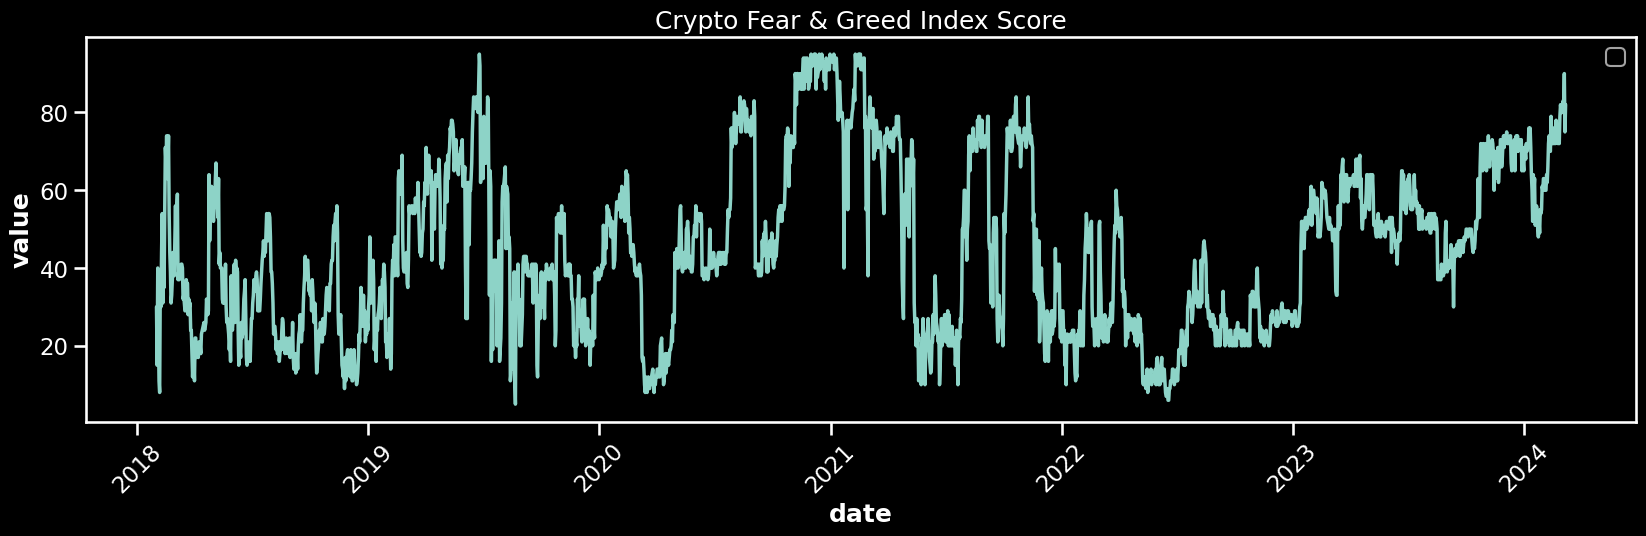

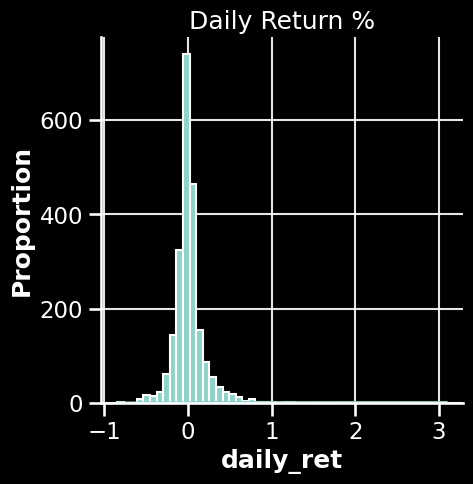

In [41]:
#@title
#@title


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use("dark_background")
#sns.set_theme(style="darkgrid")

#Choose the date range
df_fear_greed = df_fear_greed[(df_fear_greed['date'] > '2016-04-01')]

df_fear_greed['value'] = df_fear_greed['value'].astype(int)

plt.figure(figsize=(20, 5))

sns.lineplot(data=df_fear_greed, linewidth=2.5, x="date", y="value", sort=False)
#sns.lineplot(df_fear_greed=df, linewidth=2.5, x="date", y="TotalCapMrktCurUSD")
plt.title('Crypto Fear & Greed Index Score')

plt.xticks(rotation=45)

plt.legend()


df_fear_greed.head(1)


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

df_fear_greed['daily_ret'] = df_fear_greed['value'].pct_change(1)

ECDF = sns.displot(df_fear_greed, x="daily_ret", kind="ecdf")

Histogram = df_fear_greed['daily_ret'].hist(bins = 50)


plt.title('Daily Return %')

plt.show()

# Technical Analysis

In [42]:
#@title S&P 500
import yfinance as yf
import plotly.graph_objects as go


ticker='SPY'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['longName']


data = yf.download(tickers=ticker, period='200d')


[*********************100%%**********************]  1 of 1 completed


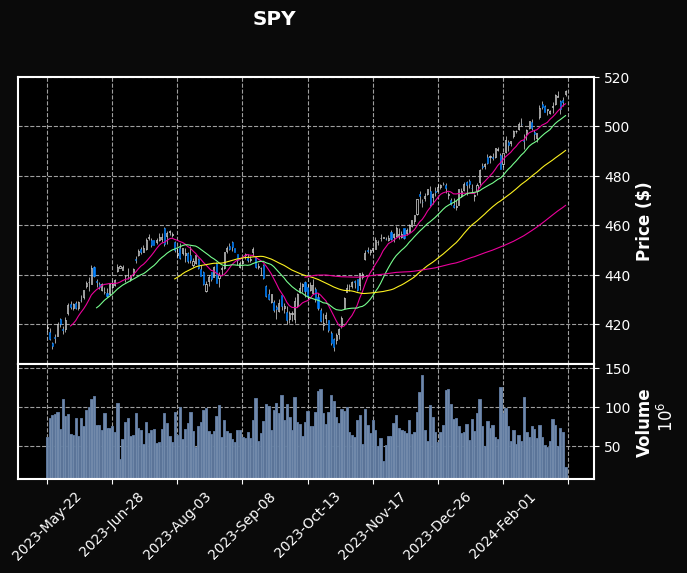

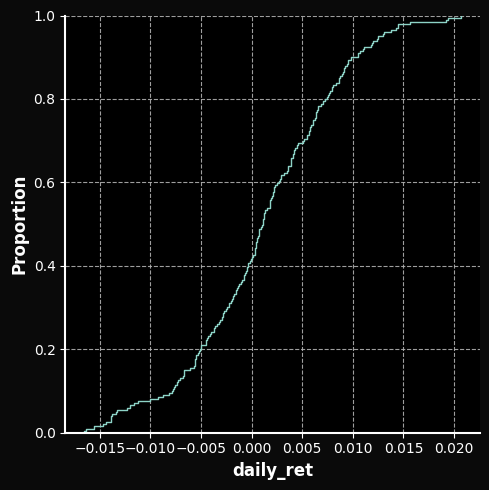

In [43]:
#@title
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")



[*********************100%%**********************]  1 of 1 completed



Related News – ^VIX

– Dow Falls 300 Points on 'Risk Off' Day
– Stock Market News for Feb 29, 2024
– Stock Market News for Feb 28, 2024
– Stocks Are in a Holding Pattern. It’s All About Inflation Data.
– Stock Market News for Feb 27, 2024
– Stock Market News for Feb 26, 2024
– Energy and Utilities Pop. Fed Minutes and Nvidia Earnings Are Coming Up Soon.


/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:707: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



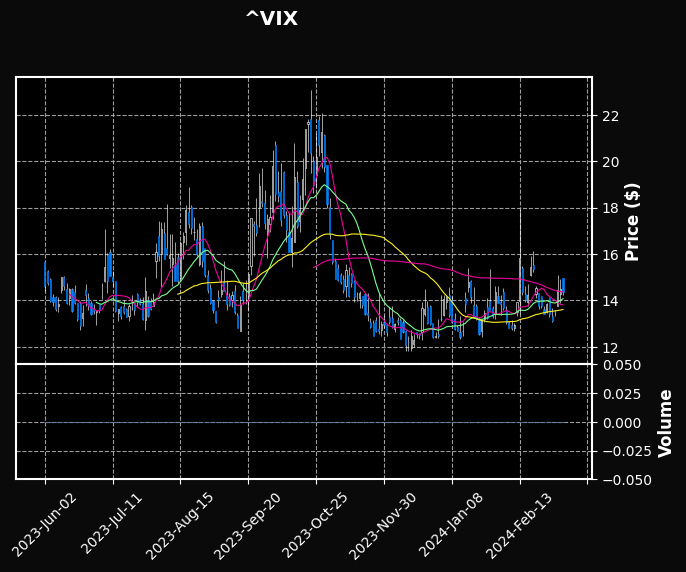

Text(0.5, 1.0, 'Daily Return %')

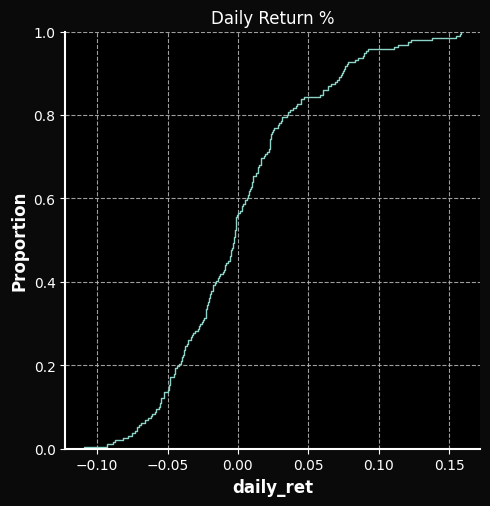

In [44]:
#@title  VIX
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='^VIX'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['Ticker']

data = yf.download(tickers=ticker, period='200d')
print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")


plt.title('Daily Return %')

/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:707: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



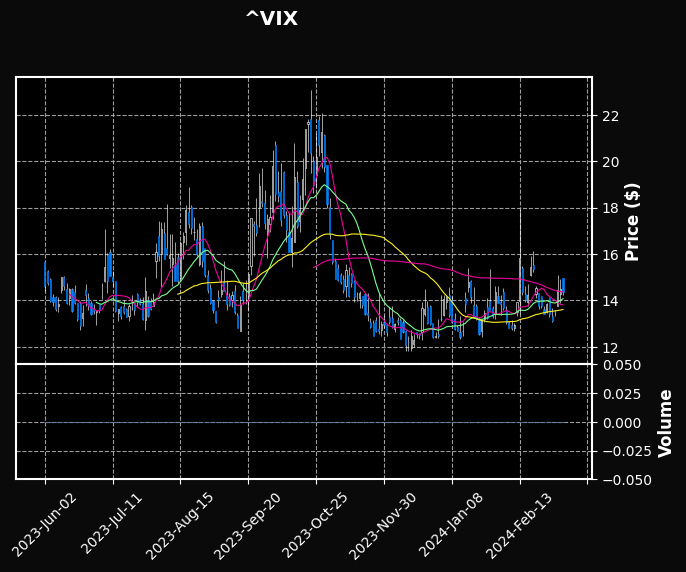

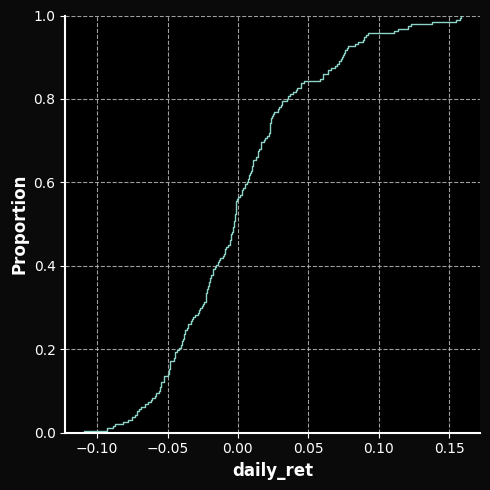

In [45]:
#@title

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )


data['daily_ret'] = data['Close'].pct_change(1)

sns.displot(data, x="daily_ret", kind="ecdf")

[*********************100%%**********************]  1 of 1 completed



Related News – BTC-USD

– China just pulled the country version of a company canceling its quarterly earnings call
– Home Depot Regional Rental Manager Talks Overcoming Obstacles and Believing in Yourself
– Sweden Life Insurance Industry Report 2023: Key Trends, Opportunities and Forecasts 2019-2023 and 2024-2028
– Source.ag Unveils Source Irrigation Control
– Best-Selling Author Dr. Daniel Amen and Dr. Charles Fay Release New Book 'Raising Mentally Strong Kids'
– Germany remands Baader-Meinhof suspect over 1990s attacks
– $4M Grant to Support Displaced Oil and Gas Workers in Contra Costa County


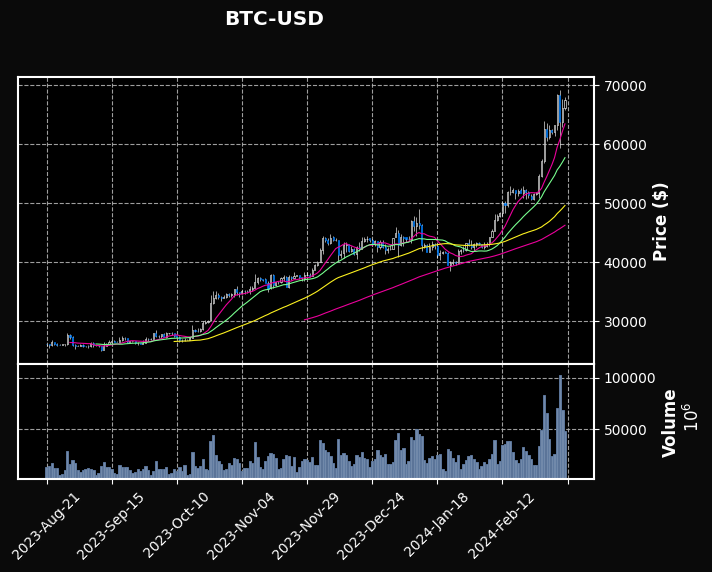

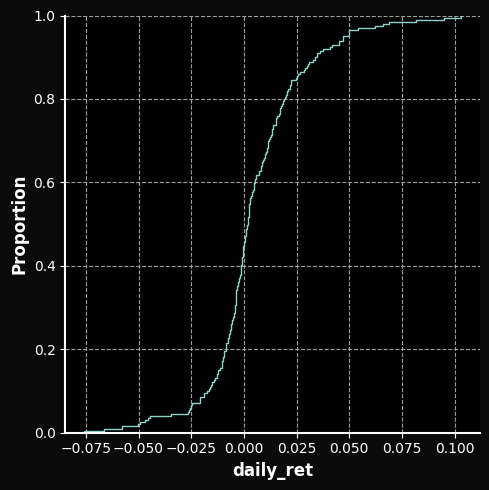

In [46]:
#@title Bitcoin
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='BTC-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='200d')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )
data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%%**********************]  1 of 1 completed



Related News – ETH-USD

– China just pulled the country version of a company canceling its quarterly earnings call
– Home Depot Regional Rental Manager Talks Overcoming Obstacles and Believing in Yourself
– Sweden Life Insurance Industry Report 2023: Key Trends, Opportunities and Forecasts 2019-2023 and 2024-2028
– Source.ag Unveils Source Irrigation Control
– Best-Selling Author Dr. Daniel Amen and Dr. Charles Fay Release New Book 'Raising Mentally Strong Kids'
– Germany remands Baader-Meinhof suspect over 1990s attacks
– $4M Grant to Support Displaced Oil and Gas Workers in Contra Costa County


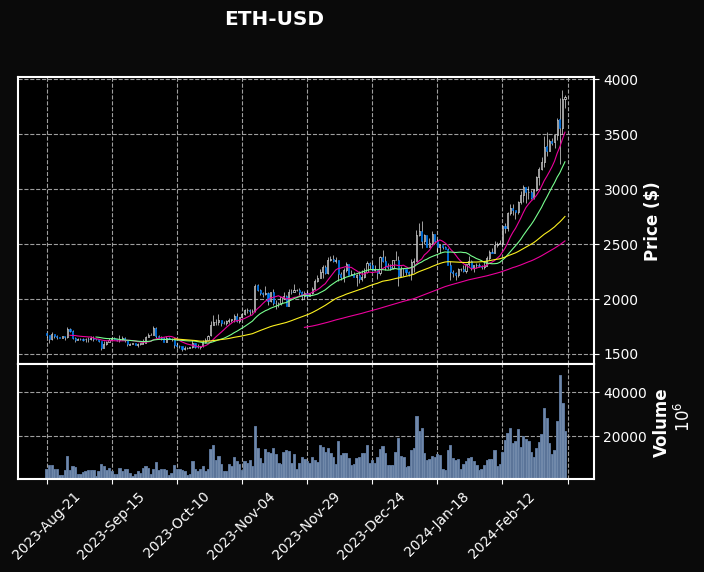

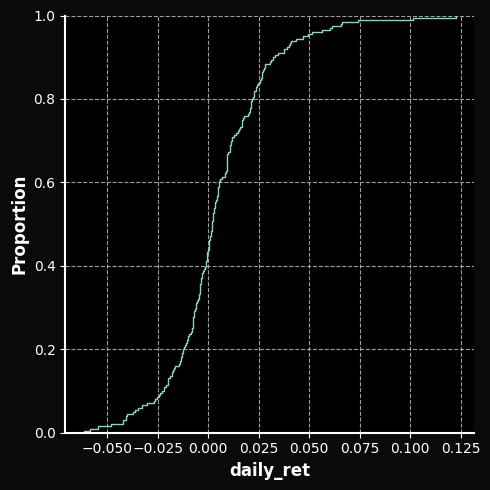

In [47]:
#@title Ethereum
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

ticker='ETH-USD'


ticker_y = yf.Ticker(ticker)
#Name = ticker_y.info['shortName']
#ticker_y.info

data = yf.download(tickers=ticker, period='200d')



print('')
print('Related News – ' +ticker)
print('')

try:
  for i in range(1,10):
    print('– ' + ticker_y.news[i]['title'])

except Exception:
  pass


fplt.plot(
            data,
            type='candle',
            style='mike',
            title =ticker,
            ylabel='Price ($)',
            volume=True,
            mav = (10,20,50,100,200),
            ylabel_lower='Volume',
            )

data['daily_ret'] = data['Close'].pct_change(1)


sns.displot(data, x="daily_ret", kind="ecdf")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DXY']: Exception("%ticker%: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GLD-USD']: Exception("%ticker%: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']")
<ipython-input-48-621efde3a4c1>:30: FutureWarning:

In a fu

<Figure size 640x480 with 0 Axes>

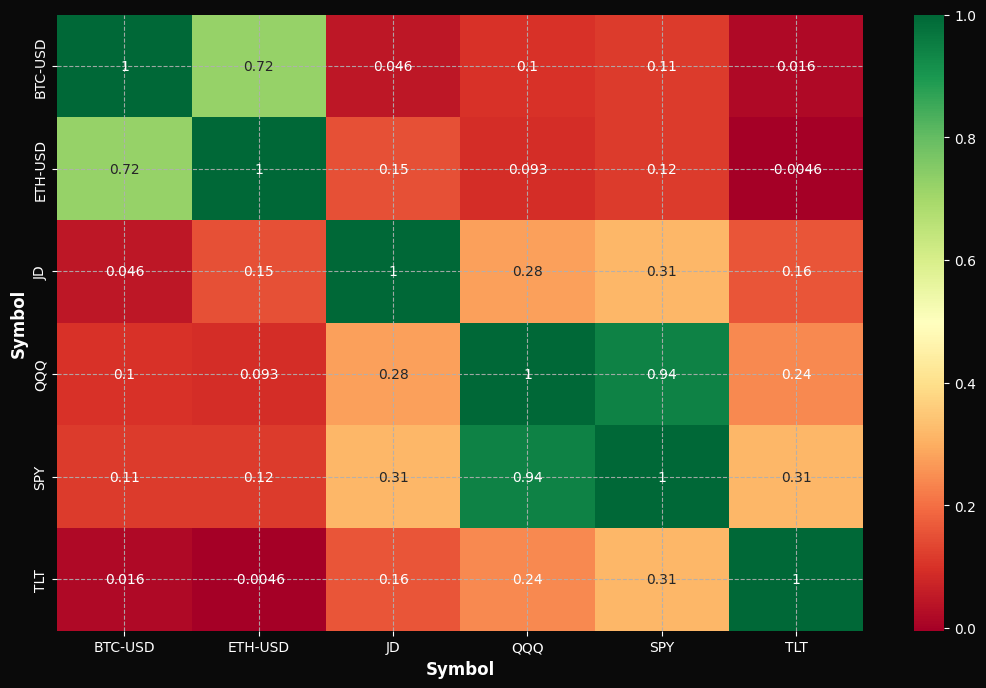

<Figure size 640x480 with 0 Axes>

In [48]:
#@title Correlation

import numpy as np
import pandas as pd
# Used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime
# To visualize the results
import matplotlib.pyplot as plt
import seaborn

start = datetime(2022,9, 1)
symbols_list = [yahoo_id,'SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DXY', 'GLD-USD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:

    r = yf.download(tickers=ticker, period='200d')
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
unknown= df[['Date', 'Adj Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Adj Close')#.reset_index()
df_pivot.head()
# Calculate the percentage change (price returns) for each stock
returns = df_pivot.pct_change().dropna()
corr_df = returns.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DXY']: Exception("%ticker%: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GLD-USD']: Exception("%ticker%: Period '200d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']")
<ipython-input-49-1a85edfbedff>:19: FutureWarning:

In a fu

<Figure size 640x480 with 0 Axes>

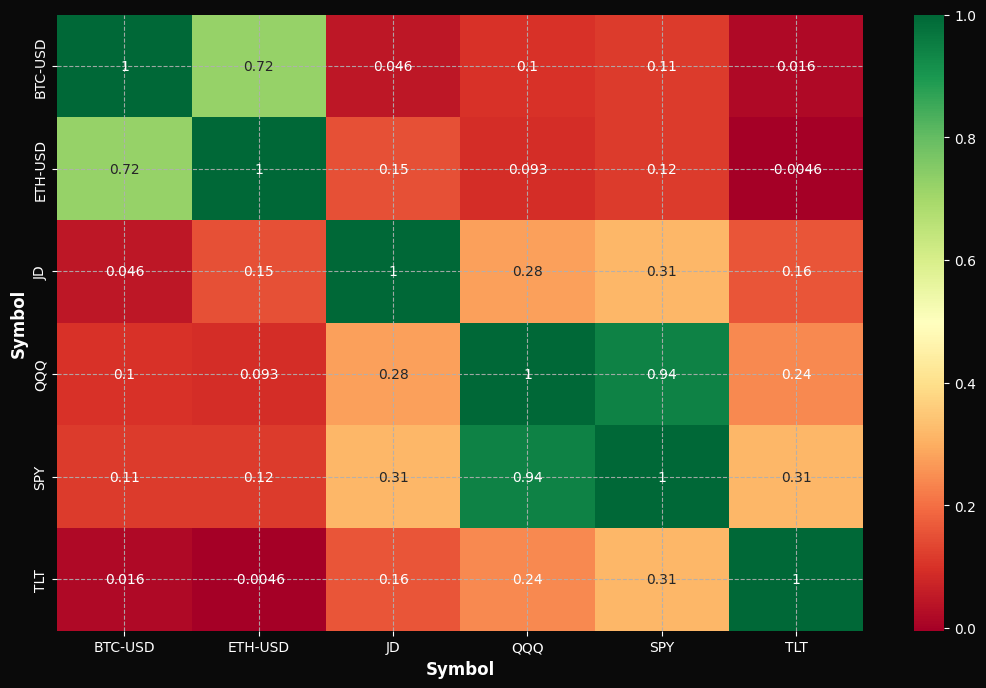

<Figure size 640x480 with 0 Axes>

In [49]:

start = datetime(2022,9, 1)
symbols_list = [yahoo_id,'SPY', 'QQQ', 'ETH-USD', 'BTC-USD', 'TLT', 'DXY', 'GLD-USD']
#array to store prices
symbols=[]

#array to store prices
symbols=[]
for ticker in symbols_list:

    r = yf.download(tickers=ticker, period='200d')
    # add a symbol column
    r['Symbol'] = ticker
    symbols.append(r)
# concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
unknown= df[['Date', 'Adj Close', 'Symbol']]
df.head()
df_pivot=df.pivot('Date','Symbol','Adj Close')#.reset_index()
df_pivot.head()
# Calculate the percentage change (price returns) for each stock

corr_df = returns.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

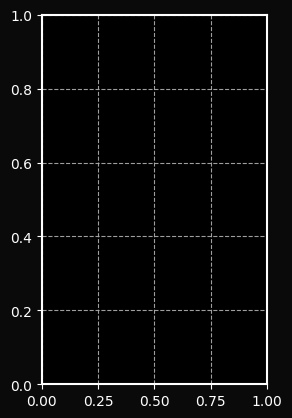

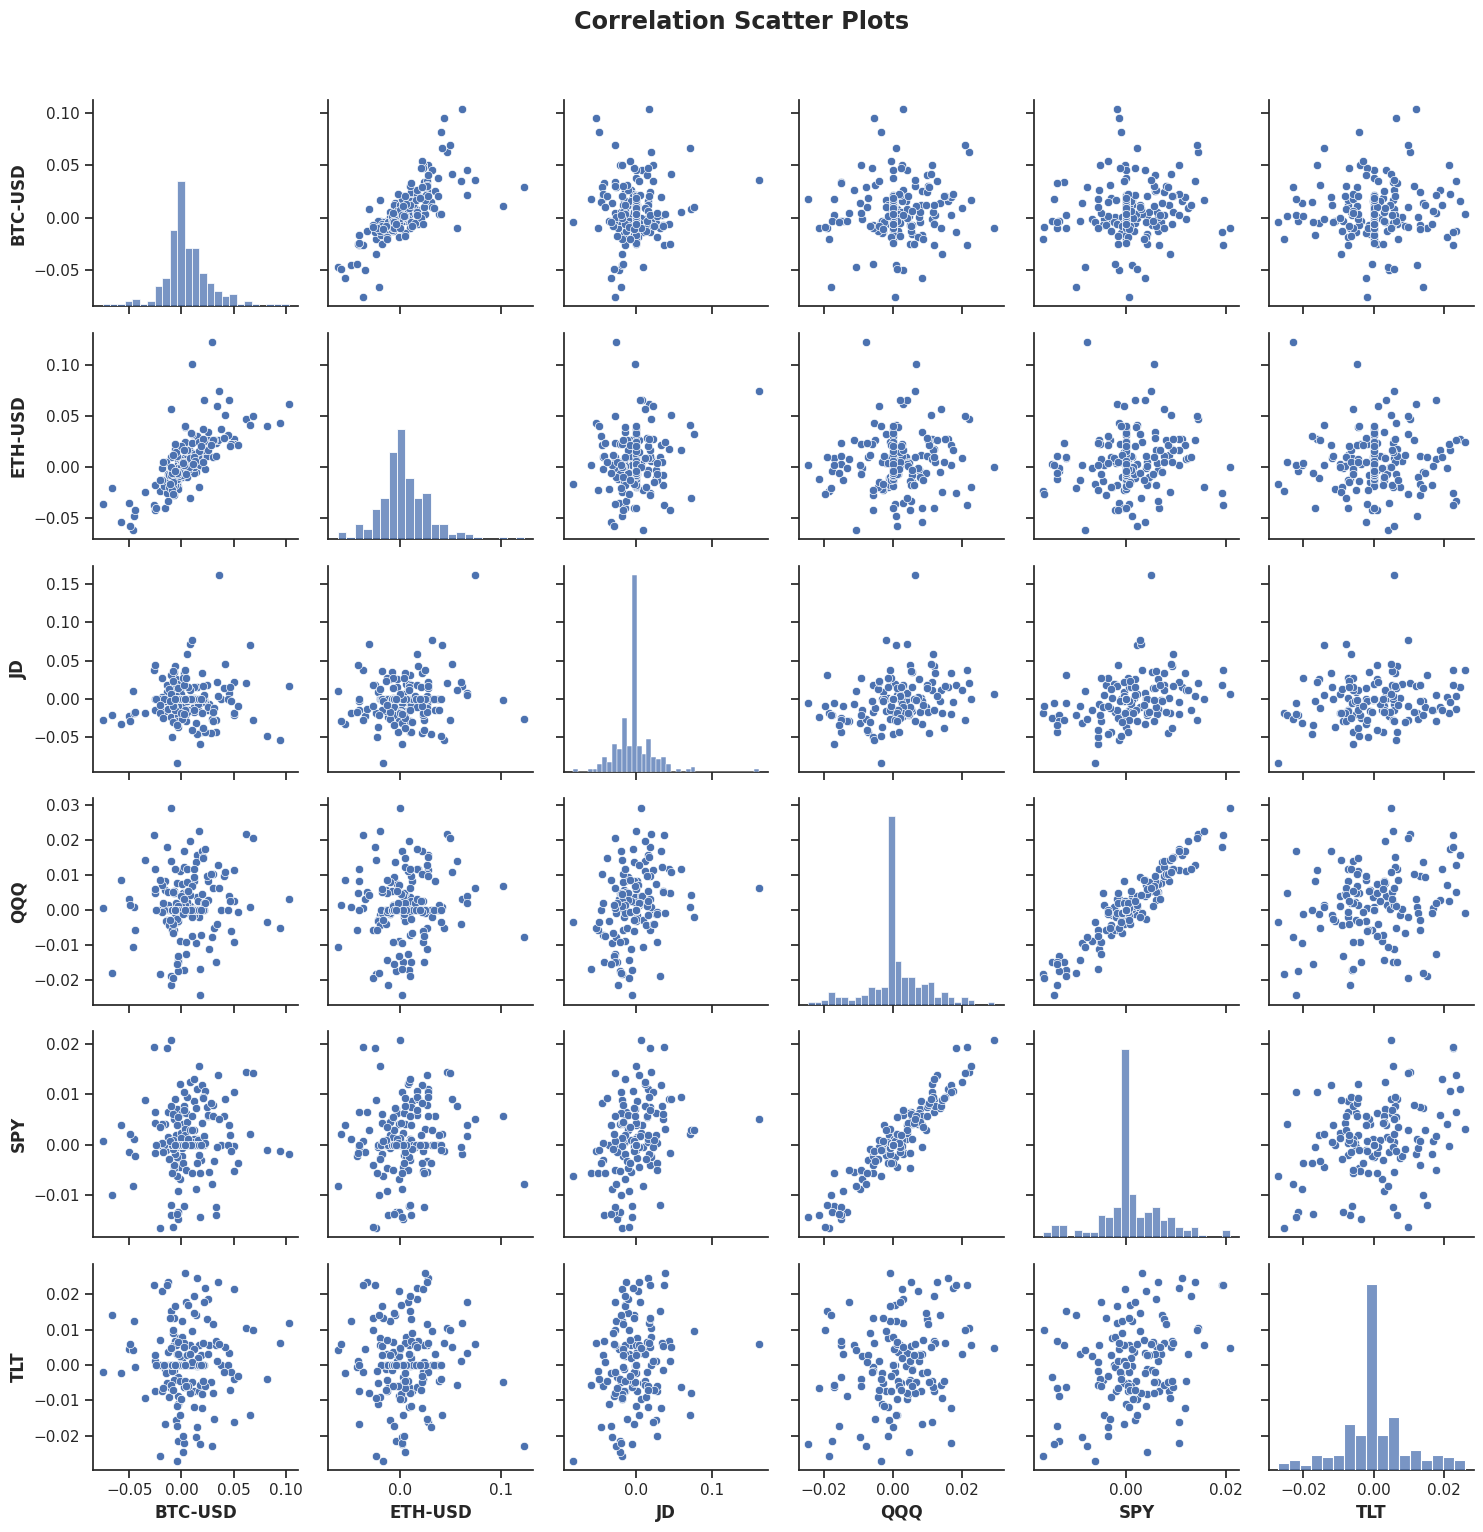

<Figure size 640x480 with 0 Axes>

In [50]:
# Plot the scatter plots
plt.subplot(122)
sns.set(style='ticks')
sns.pairplot(returns)
plt.suptitle('Correlation Scatter Plots', y=1.02)

plt.tight_layout()
plt.show()
# Save the plot as a JPEG image
plt.savefig('correlation_plot.jpg', dpi=300, format='jpeg')

# Crypto

Trade Management

In [51]:
#@title Fundamentals

import requests
import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()


response = requests.get("https://api.coingecko.com/api/v3/coins/{}".format(CoinGecko_id))
output = response.text
json_parsed = json.loads(output)


x = json_parsed['market_data']['fully_diluted_valuation']

def fdv_none_val(x):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if x is None :
    fully_diluted_valuation = 0
  else :
    fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']

  return fully_diluted_valuation



def zero_div(x,y):
  """
  handling 0 division error

  """
  try:
      return x/y
  except ZeroDivisionError:
      return 0
links = 'Complete list: '+str(json_parsed['links'])
chat_url = 'Chat: '+str(json_parsed['links']['chat_url'])
CoinGecko_Link =  'CoinGecko: '+ "https://www.coingecko.com/en/coins/" + CoinGecko_id
Twitters = 'Twitter: '+str('https://twitter.com/')+str(json_parsed['links']['twitter_screen_name'])
homepage = 'Homepage: '+str(json_parsed['links']['homepage'])
subreddit_url =  'Reddit: ' +str(json_parsed['links']['subreddit_url'])
pd.set_option('display.width', 10)

print('')
print('WEB Links')
print('')
print(homepage)
print(Twitters)
print(subreddit_url)
print(chat_url)
print(CoinGecko_Link)

print(links)

print('')
print('MARKET DATA')
print('')


market_cap = json_parsed['market_data']['market_cap']['usd']
circulating_supply = json_parsed['market_data']['circulating_supply']
# circulating_supply.astype(int)
current_price = json_parsed['market_data']['current_price']['usd']
# current_price.astype(int)
fdv_to_tvl_rati = json_parsed['market_data']['fdv_to_tvl_ratio']
# fdv_to_tvl_ratio.astype(int)


#fully_diluted_valuation = json_parsed['market_data']['fully_diluted_valuation']['usd']

# fully_diluted_valuation
total_supply = json_parsed['market_data']['total_supply']
max_supply = json_parsed['market_data']['max_supply']
mcap_to_tvl_ratio = json_parsed['market_data']['mcap_to_tvl_ratio']
total_supply = json_parsed['market_data']['total_supply']
#total_value_locked = json_parsed['market_data']['total_value_locked']['usd']
total_volume = json_parsed['market_data']['total_volume']['usd']

float_rotation_24h = zero_div(total_volume , market_cap)
circulating_cap = current_price * json_parsed['market_data']['circulating_supply']
total_cap = current_price * total_supply


def max_cap(current_price, max_supply):
  """
    Calculation of maximum capitalization
     Requiring current price and maximum supply
  """
  if max_supply is not None :
    max_cap = current_price * max_supply
  else :
    max_cap = 0
  return max_cap

max_cap = max_cap(current_price, max_supply)



def max_supply_expansion_multiple(circulating_supply, max_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if max_supply is None :
    max_supply_expansion_multiple = 0

  elif circulating_supply ==  0:
    max_supply_expansion_multiple == 0

  else :
    max_supply_expansion_multiple = max_supply  / circulating_supply

  return max_supply_expansion_multiple


max_supply_expansion_multiple = max_supply_expansion_multiple(circulating_supply, max_supply)

def total_supply_expansion_multiple(circulating_supply, total_supply):
  """
    Calculating supply expansion multiple
    Requiring maximum supply and circulating supply
  """
  if total_supply is None :
    total_supply_expansion_multiple = 0

  elif circulating_supply == 0:
    total_supply_expansion_multiple == 0

  else :
    total_supply_expansion_multiple = total_supply  / circulating_supply

  return total_supply_expansion_multiple


"""
def market_cap_dilution_ratio(fully_diluted_valuation, market_cap):


  if fully_diluted_valuation or market_cap is None :
    market_cap_dilution_ratio == 0

  elif fully_diluted_valuation or market_cap is 0:
    market_cap_dilution_ratio == 0

  elif fully_diluted_valuation or market_cap is {}:
    market_cap_dilution_ratio == 0

  else :
    market_cap_dilution_ratio =  fully_diluted_valuation / market_cap

  return market_cap_dilution_ratio


market_cap_dilution_ratio = market_cap_dilution_ratio(fully_diluted_valuation, market_cap)
"""

print('')

circulating_versus_max = circulating_supply/total_supply
dict_custom = {}
#dict_custom['total_supply_expansion_multiple'] = total_supply_expansionWhere_multiple
dict_custom['max_supply_expansion_multiple'] = max_supply_expansion_multiple
dict_custom['float_rotation_24h'] = float_rotation_24h

dict_custom['circulating_versus_max'] = circulating_versus_max


print(dict_custom)

df_market = {}
df_market['market_cap'] = market_cap
#Final been up what is on the national emergency, informative or what basket is something the P is the spaciousness up to Sarah  ankedat1['circulating_supply'] = circulating_supply
df_market['current_price'] = current_price
# df_market['fdv_to_tvl_ratio'] = fdv_to_tvl_ratio#
#df_market['fully_diluted_valuation'] = fully_diluted_valuation
# ankedat1['max_supply'] = max_supply
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_supply'] = total_supply
#df_market['total_value_locked'] = total_value_locked
df_market['mcap_to_tvl_ratio'] = mcap_to_tvl_ratio
df_market['total_volume'] = total_volume


print(df_market)




print('          ')
print('PRICE ACTION')
price_change_percentage_7d = json_parsed['market_data']['price_change_percentage_7d']
price_change_percentage_14d = json_parsed['market_data']['price_change_percentage_14d']
price_change_percentage_30d = json_parsed['market_data']['price_change_percentage_30d']
price_change_percentage_60d = json_parsed['market_data']['price_change_percentage_60d']
price_change_percentage_200d = json_parsed['market_data']['price_change_percentage_200d']
price_change_percentage_1y = json_parsed['market_data']['price_change_percentage_1y']



dict_return = {}
dict_return['price_change_percentage_7d'] = price_change_percentage_7d
dict_return['price_change_percentage_14d'] = price_change_percentage_14d
dict_return['price_change_percentage_30d'] = price_change_percentage_30d
dict_return['price_change_percentage_60d'] = price_change_percentage_60d
dict_return['price_change_percentage_200d'] = price_change_percentage_200d
dict_return['price_change_percentage_1y'] = price_change_percentage_1y

print(dict_return)



category = json_parsed['categories']

print('')
print('CATEGORIES')
print(category)




description  = []
pd.set_option('display.width', 10)
pd.set_option("display.max_rows", None, "display.max_columns", None)
description = json_parsed['description']['en']

print('')
print('DESCRIPTION: ')
print(description)


links = json_parsed['links']

print('')
print('LIQUIDITY: ')
print('')

a = json_parsed['tickers']
data = pd.json_normalize(a,max_level=4)
df = pd.DataFrame(data)

df['pair'] = df['base'] + df['target']

df['market_and_volume'] = df['market.name']+ ' (' + df['volume'].round(1).astype(str)+')'
df['Exchanges'] = df.apply(lambda _: ', '.join(df['market_and_volume'] .tolist()), axis=1)
df['Exchanges'][1]

df


WEB Links

Homepage: ['http://www.bitcoin.org', '', '']
Twitter: https://twitter.com/bitcoin
Reddit: https://www.reddit.com/r/Bitcoin/
Chat: ['', '', '']
CoinGecko: https://www.coingecko.com/en/coins/bitcoin
Complete list: {'homepage': ['http://www.bitcoin.org', '', ''], 'whitepaper': 'https://bitcoin.org/bitcoin.pdf', 'blockchain_site': ['https://mempool.space/', 'https://blockchair.com/bitcoin/', 'https://btc.com/', 'https://btc.tokenview.io/', 'https://www.oklink.com/btc', 'https://3xpl.com/bitcoin', '', '', '', ''], 'official_forum_url': ['https://bitcointalk.org/', '', ''], 'chat_url': ['', '', ''], 'announcement_url': ['', ''], 'twitter_screen_name': 'bitcoin', 'facebook_username': 'bitcoins', 'bitcointalk_thread_identifier': None, 'telegram_channel_identifier': '', 'subreddit_url': 'https://www.reddit.com/r/Bitcoin/', 'repos_url': {'github': ['https://github.com/bitcoin/bitcoin', 'https://github.com/bitcoin/bips'], 'bitbucket': []}}

MARKET DATA


{'max_supply_expansion_multipl

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,market.name,market.identifier,market.has_trading_incentive,converted_last.btc,converted_last.eth,converted_last.usd,converted_volume.btc,converted_volume.eth,converted_volume.usd,pair,market_and_volume,Exchanges
0,BTC,USDT,6.755664e+04,53354.091290,green,0.011049,2024-03-07T17:07:37+00:00,2024-03-07T17:07:37+00:00,2024-03-07T17:07:37+00:00,False,False,https://www.orangex.com/spot/BTC-USDT-SPOT,None,bitcoin,tether,OrangeX,orangex,False,1.002279,17.603241,67651,52738.000000,926253.000,3559702476,BTCUSDT,OrangeX (53354.1),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
1,BTC,USDT,6.739367e+04,54635.162210,green,0.010015,2024-03-07T17:05:01+00:00,2024-03-07T17:05:01+00:00,2024-03-07T17:07:00+00:00,False,False,https://www.binance.com/en/trade/BTC_USDT?ref=...,None,bitcoin,tether,Binance,binance,False,0.999861,17.560776,67488,54055.000000,949378.000,3648572364,BTCUSDT,Binance (54635.2),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
2,BTC,USDC,6.746771e+04,2537.552340,green,0.011244,2024-03-07T17:05:49+00:00,2024-03-07T17:05:49+00:00,2024-03-07T17:05:49+00:00,False,False,https://www.tapbit.com/spot/exchange/BTC_USDC,None,bitcoin,usd-coin,Tapbit,tapbit,False,1.000663,17.582236,67435,2510.000000,44102.000,169147247,BTCUSDC,Tapbit (2537.6),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
3,BTC,USDT,6.739962e+04,11857.800800,green,0.011127,2024-03-07T17:05:50+00:00,2024-03-07T17:05:50+00:00,2024-03-07T17:05:50+00:00,False,False,https://www.hotcoin.com/currencyExchange/btc_usdt,None,bitcoin,tether,Hotcoin Global,hotcoin_global,False,0.999949,17.569700,67386,11857.000000,208338.000,799055507,BTCUSDT,Hotcoin Global (11857.8),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
4,BTC,USD,6.748440e+04,3189.500552,green,0.010148,2024-03-07T17:05:01+00:00,2024-03-07T17:05:01+00:00,2024-03-07T17:07:00+00:00,False,False,https://pro.kraken.com/app/trade/BTC-USD,None,bitcoin,NaN,Kraken,kraken,False,0.999805,17.559792,67484,3189.000000,56007.000,215241531,BTCUSD,Kraken (3189.5),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
5,BTC,USD,6.757236e+04,21259.153925,green,0.017148,2024-03-07T17:06:02+00:00,2024-03-07T17:06:02+00:00,2024-03-07T17:07:00+00:00,False,False,https://pro.coinbase.com/trade/BTC-USD,None,bitcoin,NaN,Coinbase Exchange,gdax,False,1.001108,17.582680,67572,21283.000000,373793.000,1436531202,BTCUSD,Coinbase Exchange (21259.2),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
6,BTC,USDT,6.739810e+04,1114.121019,green,0.012520,2024-03-07T17:05:45+00:00,2024-03-07T17:05:45+00:00,2024-03-07T17:05:45+00:00,False,False,https://www.weex.com/trade/btc_usdt,None,bitcoin,tether,WEEX,weex,False,0.999927,17.569304,67385,1114.000000,19574.000,75075005,BTCUSDT,WEEX (1114.1),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
7,BTC,USDT,6.733326e+04,6954.600384,green,0.010015,2024-03-07T17:04:43+00:00,2024-03-07T17:04:43+00:00,2024-03-07T17:04:43+00:00,False,False,https://www.mexc.com/exchange/BTC_USDT,None,bitcoin,tether,MEXC,mxc,False,1.000292,17.573519,67409,6957.000000,122217.000,468800105,BTCUSDT,MEXC (6954.6),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
8,BTC,USDT,6.730404e+04,1935.821294,green,0.010015,2024-03-07T17:03:09+00:00,2024-03-07T17:03:09+00:00,2024-03-07T17:03:09+00:00,False,False,https://www.citex.info/zh_CN/v5/proTrade/BTC_U...,None,bitcoin,tether,CITEX,citex,False,0.999858,17.564239,67388,1918.000000,33685.000,129236948,BTCUSDT,CITEX (1935.8),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."
9,BTC,USDT,6.746820e+04,2010.432108,green,0.010148,2024-03-07T17:06:27+00:00,2024-03-07T17:06:27+00:00,2024-03-07T17:06:27+00:00,False,False,https://gate.io/trade/BTC_USDT,None,bitcoin,tether,Gate.io,gate,False,1.000967,17.589329,67512,1991.000000,34983.000,134271835,BTCUSDT,Gate.io (2010.4),"OrangeX (53354.1), Binance (54635.2), Tapbit (..."


In [52]:

#@title Charts


import datetime
import time
import json
from google.colab import data_table
from pycoingecko import CoinGeckoAPI
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq


cg = CoinGeckoAPI()

"""
1 - 2 days: 30 minutes
3 - 30 days: 4 hours
31 days and beyond: 4 days
"""
#chart  1
a = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 'max' )
df  = pd.DataFrame(data=a, columns = ['Date','Open','High', 'Low', 'Close'])
df['datetime'] = pd.to_datetime(df['Date'], unit='ms')
fig2 = go.Figure(data=[go.Candlestick(x=df['datetime'],open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])
fig2.show()

#chart   2
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 180 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])
fig3.show()

#chart   3
b = cg.get_coin_ohlc_by_id(id=CoinGecko_id, vs_currency='usd', days = 30 )
df2  = pd.DataFrame(data=b, columns = ['Date','Open','High', 'Low', 'Close'])
df2['datetime'] = pd.to_datetime(df2['Date'], unit='ms')
fig3 = go.Figure(data=[go.Candlestick(x=df2['datetime'],open=df2['Open'], high=df2['High'],low=df2['Low'], close=df2['Close'])])
fig3.show()


<ipython-input-53-fb6b5b4e3882>:16: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "y1" (-> marker='1'). The keyword argument will take precedence.

<ipython-input-53-fb6b5b4e3882>:16: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "y1" (-> color='y'). The keyword argument will take precedence.



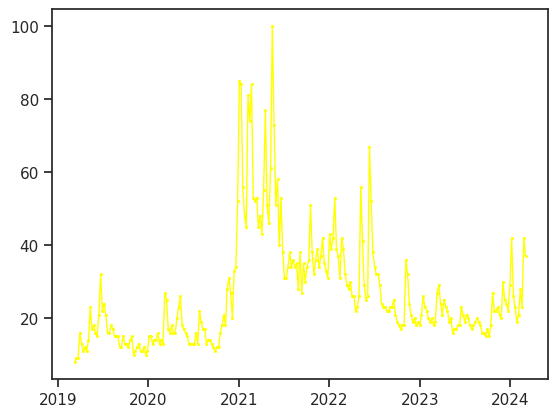

In [53]:
#@title Google Trends
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
keyword = str(CoinGecko_id)
keyword = keyword.replace('-',' ')
pytrend.build_payload(kw_list=[keyword])


interest_over_time_df = pytrend.interest_over_time()
df_Google=interest_over_time_df

#print(interest_over_time_df.tail(10))
# multiple line plot
# multiple line plot
plt.plot( keyword, 'y1', data=df_Google, marker='x', color='yellow',linestyle='-', linewidth=1,ms=1.5 )

# Stocks

[*********************100%%**********************]  1 of 1 completed


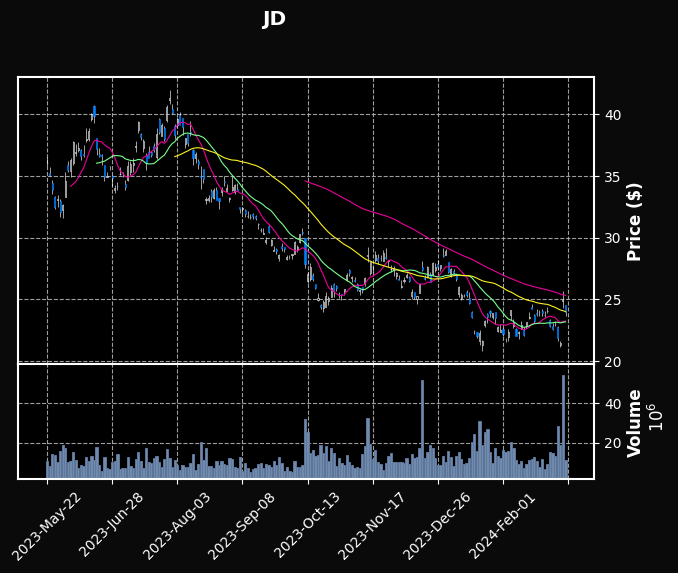

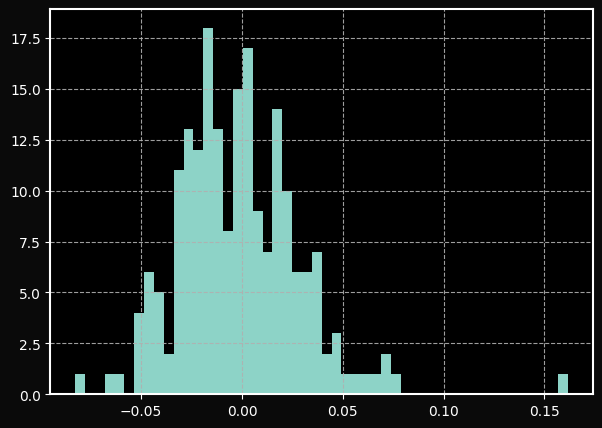

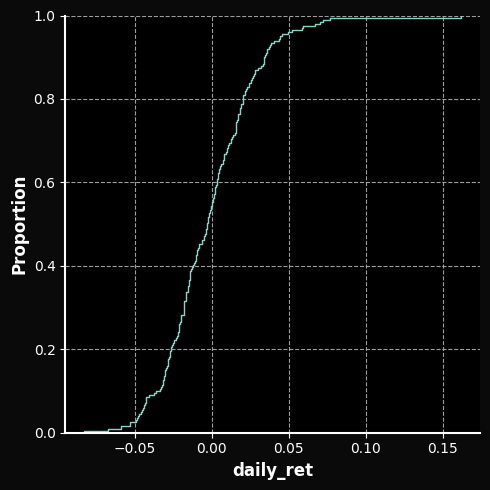

In [57]:
#@title Chart
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go


ticker=yahoo_id

data = yf.download(tickers=ticker, period='200d')
#@title
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='mike',
            title=ticker,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Volume',
            mav = (10,20,50,100,200)
            )

data['daily_ret'] = data['Close'].pct_change(1)
data['daily_ret'].hist(bins = 50,figsize = (7,5))

sns.displot(data, x="daily_ret", kind="ecdf")

In [58]:
#@title Seasonality

#Back test

In [59]:
tickr = yf.Ticker(ticker)

In [60]:
# get all stock info
tickr.info

{'address1': 'Building A, 20th Floor',
 'address2': 'No. 18 Kechuang 11 Street Yizhuang Eco & Tech Dev Zn Daxing District',
 'city': 'Beijing',
 'zip': '101111',
 'country': 'China',
 'phone': '86 10 8911 8888',
 'website': 'https://www.jd.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "JD.com, Inc. provides supply chain-based technologies and services in the People's Republic of China. The company offers computers, communication, and consumer electronics products, as well as home appliances; and general merchandise products comprising food, beverage and fresh produce, baby and maternity products, furniture and household goods, cosmetics and other personal care items, pharmaceutical and healthcare products, industrial products, books, automobile accessories, apparel and footwear, bags, and jewelry. I

In [62]:
# show holders
tickr.major_holders


Breakdown,Value
insidersPercentHeld,0.05310
institutionsPercentHeld,0.16974
institutionsFloatPercentHeld,0.17926
institutionsCount,711.00000


In [63]:
tickr.actions

,Dividends,Stock Splits
Date,,
2022-05-19 00:00:00-04:00,1.26,0.0
2023-04-05 00:00:00-04:00,0.62,0.0


In [64]:
tickr.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,10,22,4,0,1
1,-1m,9,21,9,0,0
2,-2m,9,21,9,0,0
3,-3m,13,23,2,0,1


In [65]:
tickr.calendar

{'Dividend Date': datetime.date(2023, 5, 4),
 'Ex-Dividend Date': datetime.date(2023, 4, 5),
 'Earnings Date': [],
 'Earnings High': 0.81,
 'Earnings Low': 0.61,
 'Earnings Average': 0.71,
 'Revenue High': 35791600000,
 'Revenue Low': 35178700000,
 'Revenue Average': 35480400000}

In [66]:
tickr.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-03-06 05:00:00-05:00,4.47,5.30,0.1844
2023-11-15 05:00:00-05:00,5.77,6.70,0.1612
2023-08-16 06:00:00-04:00,4.79,5.39,0.1264
2023-05-11 05:00:00-04:00,3.51,4.76,0.3547
2023-03-09 05:00:00-05:00,3.48,4.81,0.3828
2022-11-18 05:00:00-05:00,4.45,6.27,0.4076
2022-08-23 06:00:00-04:00,2.71,4.06,0.4982
2022-05-17 06:00:00-04:00,1.63,2.53,0.5523
2022-03-10 04:00:00-05:00,1.54,2.21,0.4340


In [67]:
tickr.news

[{'uuid': '7c8b6abb-dbc8-326a-8a24-ceadcf6b2788',
  'title': 'JD.com, Inc. (NASDAQ:JD) Q4 2023 Earnings Call Transcript',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/jd-com-inc-nasdaq-jd-155506656.html',
  'providerPublishTime': 1709826906,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/Ky3qbUNTj1lahjZCkFH3Rg--~B/aD04MTY7dz0xNDU2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/11672800d1aa4c2d3d6ec0e023f94406',
     'width': 1456,
     'height': 816,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/OvXDgJ.grTaNF.gf85DMJA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/11672800d1aa4c2d3d6ec0e023f94406',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['JD']},
 {'uuid': '6db4aa23-db3e-34d0-8c4a-4dcc8bbaf46d',
  'title': 'Analyst Report: JD.com, Inc.',
  'publisher': 'Morningstar